Project Goals:

We will train a Linear Regression model using advertising expenditure and sales data to identify which advertising channels provide the highest return on investment (ROI). Additionally, we aim to determine which channels exhibit the most predictable relationship between money spent and sales generated (forecasting reliability).

Linear Regression models the mathematical relationship between one or more features, and a continous output. The model will create a linear line that allows us to forecast feature-to-output relationships for input values not in our original data.

_______________________________________________________________________________________________________________________________________________________________________

Installs & Imports

In [144]:
!pip install scikit-learn

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

_______________________________________________________________________________________________________________________________________________________________________

In [146]:
df = pd.read_csv('advertising.csv')
df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [147]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

No null values, and data is already in the format we need, so no real preprocessing we need to do aside from converting to a pandas dataframe!

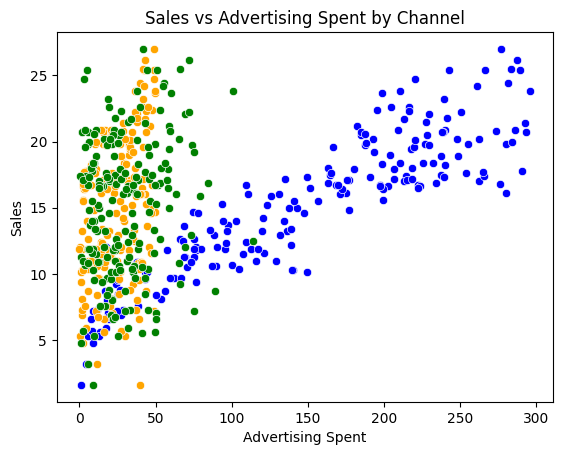

In [148]:
sns.scatterplot(data=df, x='TV', y='Sales', color='blue')
sns.scatterplot(data=df, x='Radio', y='Sales', color='orange')
sns.scatterplot(data=df, x='Newspaper', y='Sales', color='green')
plt.xlabel('Advertising Spent')
plt.ylabel('Sales')
plt.title('Sales vs Advertising Spent by Channel')
plt.show()

Our data values on a scatterplot. We can quickly see that TV advertising has a more clear positive correlation with sales compared to Radio and Newspaper

_______________________________________________________________________________________________________________________________________________________________________

Creation of test split and Linear Regression model

In [149]:
X = df[['TV', 'Radio', 'Newspaper']]  # Features
y = df['Sales']                        # Target

In [150]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
)

In [151]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


_______________________________________________________________________________________________________________________________________________________________________

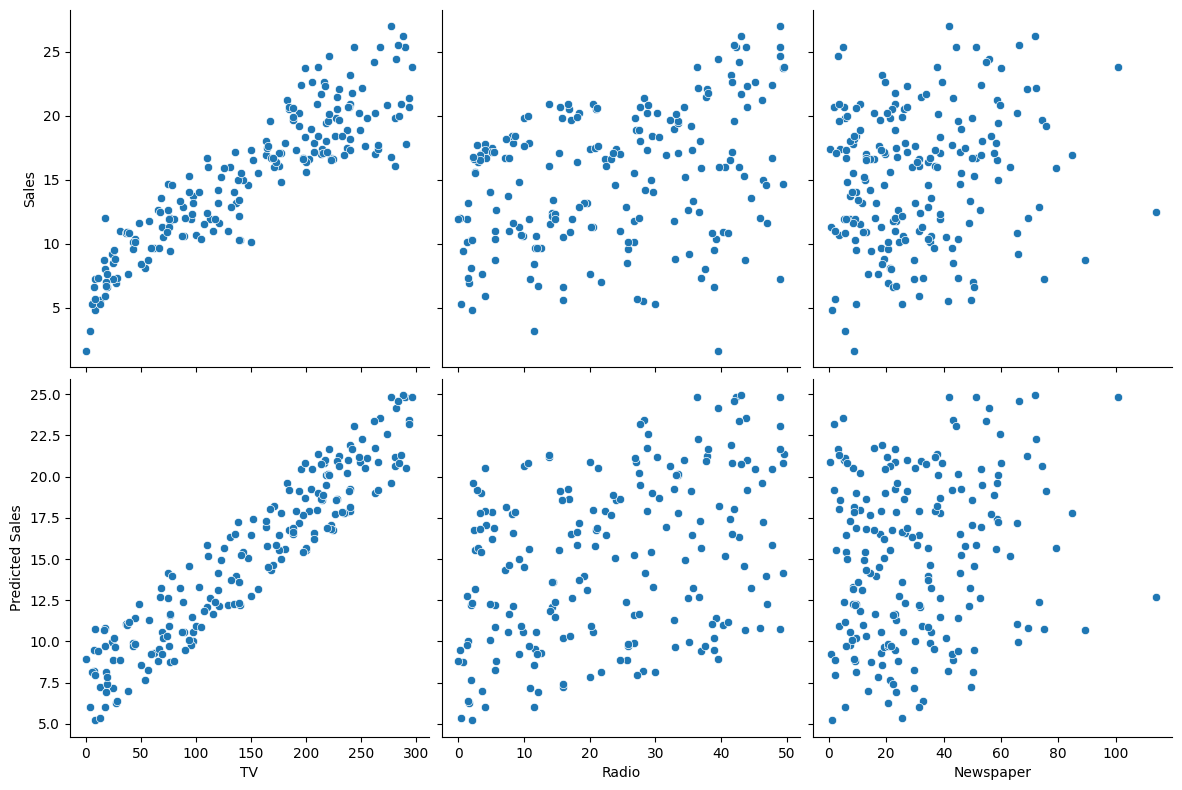

In [152]:
df['Predicted Sales'] = model.predict(df[['TV', 'Radio', 'Newspaper']])
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars=['Sales', 'Predicted Sales'], height=4, aspect=1)
plt.show()

Scatterplots showing the relationship between advertising spend by channel and resulting sales

The top row displays observed data, and the bottom row shows predictions generated by the linear regression model

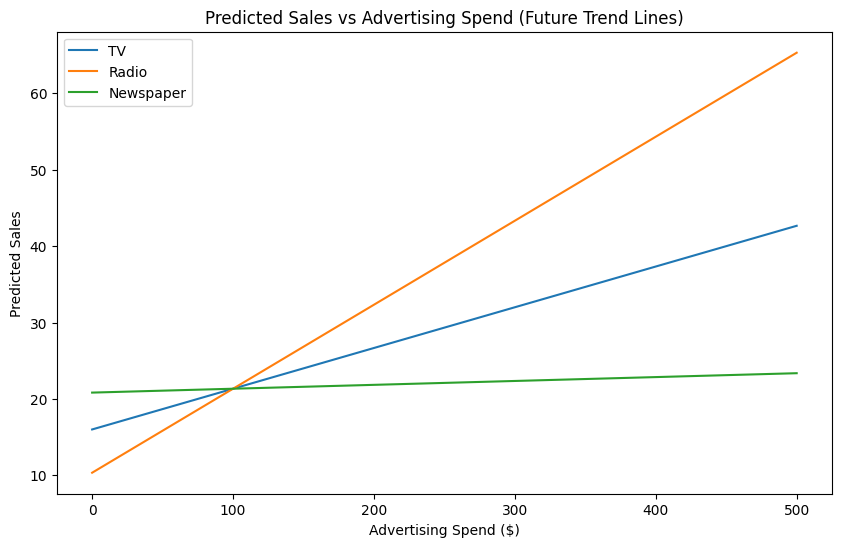

In [153]:
plt.figure(figsize=(10,6))
for feature in ['TV', 'Radio', 'Newspaper']:
    # Create future values for each advertising channel
    future_df = pd.DataFrame({
        'TV': [100]*50,
        'Radio': [100]*50,
        'Newspaper': [100]*50
    })
    # Vary only one feature at a time (0–500)
    future_df[feature] = np.linspace(0, 500, 50)
    
    # Predict directly without scaling
    preds = model.predict(future_df)
    plt.plot(future_df[feature], preds, label=feature)

plt.title('Predicted Sales vs Advertising Spend (Future Trend Lines)')
plt.xlabel('Advertising Spend ($)')
plt.ylabel('Predicted Sales')
plt.legend()
plt.show()

According to our model, Radio has the strongest positive correlation between money spent on advertising and sales, followed by TV, and then Newspaper

In [154]:

for col in ['TV', 'Radio', 'Newspaper']:
    X_single = df[[col]]
    y = df['Sales']

    # Train a model using only this feature
    model_single = LinearRegression()
    model_single.fit(X_single, y)

    # Predict and evaluate
    y_pred_single = model_single.predict(X_single)
    r2 = r2_score(y, y_pred_single)
    mse = mean_squared_error(y, y_pred_single)

    print(f"{col}: R² = {r2:.3f}, MSE = {mse:.3f}")

TV: R² = 0.812, MSE = 5.218
Radio: R² = 0.122, MSE = 24.384
Newspaper: R² = 0.025, MSE = 27.087


MSE: The lower the number, the less variance between model predictions and true values (very far off calculations are weighed more heavily)

R2: Accuracy of the variance our model predicts. The closer to "1" the closer to 100% accurate. R2 of 1 means that the spread in the data is perfectly predicted

Notably, the statistics for TV show that its linear relationship with sales is much clearer and more reliable than those for Radio and Newspaper

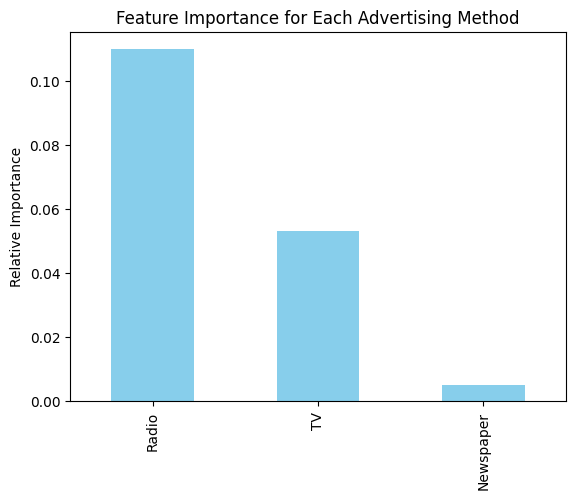

In [155]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['TV','Radio','Newspaper']])
y = df['Sales']

importance = pd.Series(model.coef_, index=['TV','Radio','Newspaper'])
importance = importance.abs().sort_values(ascending=False)

importance.plot(kind='bar', color='skyblue')
plt.title('Feature Importance for Each Advertising Method')
plt.ylabel('Relative Importance')
plt.show()

The feature importance graph shows that Radio advertising has the strongest influence on the model's sales predictions. This means that our model assigns Radio advertising spending as the strongest predictor for sales.

_______________________________________________________________________________________________________________________________________________________________________

Conclusion:

In terms of positive correlation between money invested and sales, advertising through Radio provides the highest ROI. However, model R2 score and MSE indicates that the model's predictions for TV advertising ROI are much more reliable than that of Radio and Newspaper.

This suggests that while Radio's ROI may be higher on average, the actual ROI seen is subject to quite a bit of variance and unpredictability. For this reason, TV advertising may be more practical for it's reliability and comparatively robust ROI.

Overall:
- Radio: Unpredictable, highest ROI on average, viable but unreliable
- TV: Predictable, 2nd highest ROI, most practical option but not as high a "ceiling" as Radio advertising
- Newspaper: Unpredictable, lowest ROI, least practical of the 3 advertising methods




Limitations & Considerations:

The biggest limitation of this project is its low R2 score and MSE for Radio and Newspaper advertising. This is because of the high variance in the dataset for Radio and Newspaper ROI, so overfitting for TV data is probably not the issue here.

Overall, because of the high variance for Radio and Newspaper, linear regression may not be the best ROI forecasting approach for these 2 advertising channels.

_______________________________________________________________________________________________________________________________________________________________________

Additional Experiment 1: Modeling Linear Regression for each Channel Individually

TV: R² = 0.812, MSE = 5.218
Radio: R² = 0.122, MSE = 24.384
Newspaper: R² = 0.025, MSE = 27.087


c:\Users\susha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\susha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\susha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


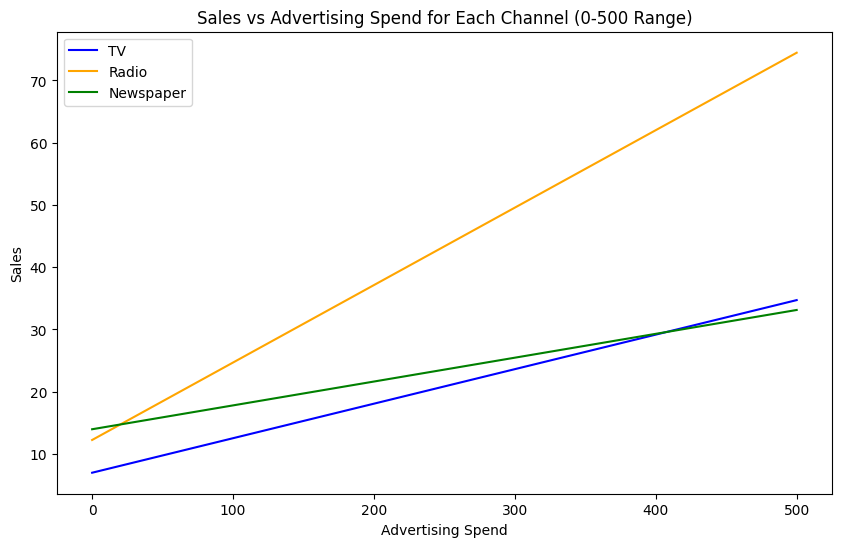

In [168]:
channels = ['TV', 'Radio', 'Newspaper']
colors = ['blue', 'orange', 'green']

plt.figure(figsize=(10,6))

for channel, color in zip(channels, colors):
    X = df[[channel]]
    y = df['Sales']
    
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    
    print(f"{channel}: R² = {r2:.3f}, MSE = {mse:.3f}")
    
    X_range = np.linspace(0, 500, 100).reshape(-1,1)
    y_range = model.predict(X_range)
    plt.plot(X_range, y_range, color=color, label=f"{channel}")

plt.xlabel('Advertising Spend')
plt.ylabel('Sales')
plt.title('Sales vs Advertising Spend for Each Channel (0-500 Range)')
plt.legend()
plt.show()

Conclusion:

Interestingly, when compared to our first experiment, we can see that the model predicts the ROI for Newspaper to actually be higher than TV when advertising expenditure is between 0-400 (but outperformed by TV after that point). ROI for Radio is predicted to be much higher than our first experiment. However, it should still be noted that R2 score and MSE remain unchanged when compared to our first experiment, so the previous assertion that Newspaper advertising is the most unviable still holds true.

According to this model, however, Radio ROI on average is so much higher than TV ROI, that the unpredictability may be worth it.

_______________________________________________________________________________________________________________________________________________________________________

Additional Experiment 2: Scaling Using StandardScaler

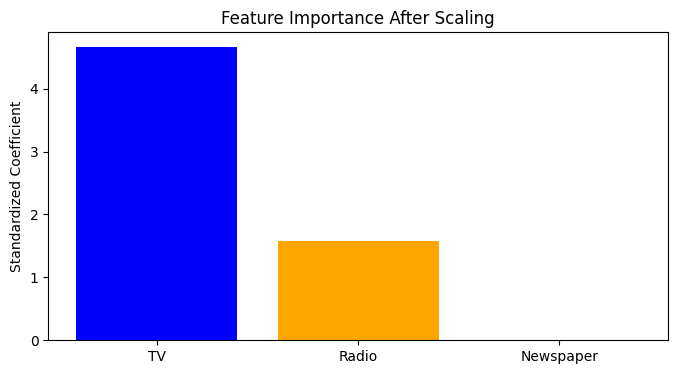

c:\Users\susha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\susha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\susha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


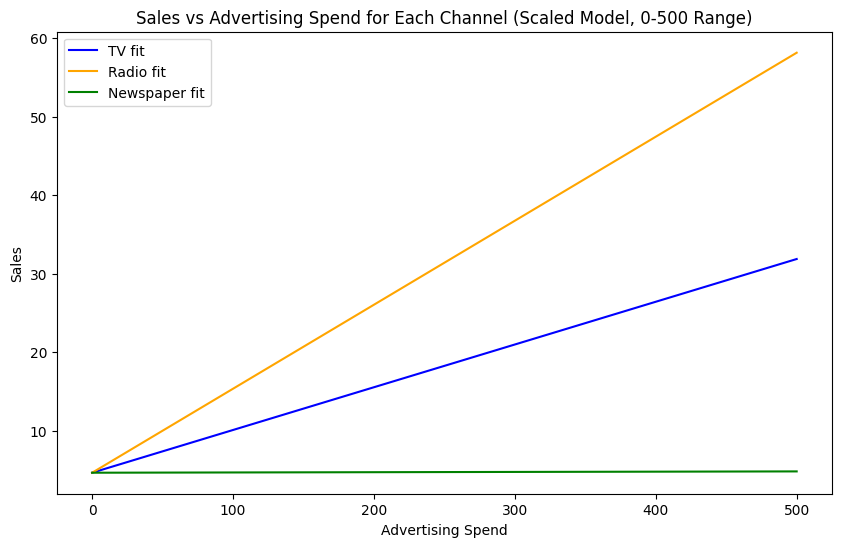

In [169]:
channels = ['TV', 'Radio', 'Newspaper']
colors = ['blue', 'orange', 'green']
X = df[channels]
y = df['Sales']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LinearRegression()
model.fit(X_scaled, y)

coef_df = pd.DataFrame({
    'Channel': channels,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(8,4))
plt.bar(coef_df['Channel'], coef_df['Coefficient'], color=colors)
plt.ylabel('Standardized Coefficient')
plt.title('Feature Importance After Scaling')
plt.show()

plt.figure(figsize=(10,6))
for channel, color in zip(channels, colors):
    X_range = np.linspace(0, 500, 100).reshape(-1,1)
    X_temp = np.zeros((100, len(channels)))
    channel_idx = channels.index(channel)
    X_temp[:, channel_idx] = X_range[:,0]
    X_temp_scaled = scaler.transform(X_temp)
    y_range = model.predict(X_temp_scaled)
    plt.plot(X_range, y_range, color=color, label=f"{channel} fit")

plt.xlabel('Advertising Spend')
plt.ylabel('Sales')
plt.title('Sales vs Advertising Spend for Each Channel (Scaled Model, 0-500 Range)')
plt.legend()
plt.show()

Conclusion:

Using StandardScale allows us to scale our data so that the model more accurately detects which channels have the greatest impact on final sales.

ROI trendlines are very similar to that of our first experiment, with the major point of difference being the importance scores assigned each channel. TV has by far the highest while Radio sits much lower, and Newspaper doesn't have any importance at all.

This experiment better portrays which features are more reliable indicators of sales. While Radio has a higher potential ROI, TV is much more reliable, similar to the conclusion drawn in our first experiment.